In [1]:
#In descion tree algorithm it start to ask the features like is the height greater than 3.2 if yes go to the next children yes node if not go to the next level nochildren node.
#Unlike other algorithms, there's no need for standardization.
#Issue with Decision Trees: Overfitting on Training Set    -->    Solution: Mitigate by Restricting Tree Growth


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingRegressor


In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data.data,columns=data.feature_names) #creating new data frame with iris samples' values
df['target']=data.target #add new column as species which gain the value from the target value of iris dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['target'], random_state=0)

In [6]:
clf=DecisionTreeClassifier(max_depth=2,random_state=0) #depth= how many split it makes before coming to prediction!

In [7]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [8]:
print('training accuracy: ',clf.predict( X_test) )

training accuracy:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2]


In [9]:
clf.score(X_test,y_test)

0.8947368421052632

###finding the optimal depth
this is the different step in such algorithms

In [11]:
max_depth_range= list(range(1,6))
accuracy=[]
for depth in max_depth_range:
  clf=DecisionTreeClassifier(max_depth=depth,random_state=0) #here max_depth should be checked for each depth of for loop otherwise you're calculating stable depth over and over
  clf.fit(X_train,y_train)
  score=clf.score(X_test,y_test)
  accuracy.append(score)

print(accuracy)


[0.5789473684210527, 0.8947368421052632, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


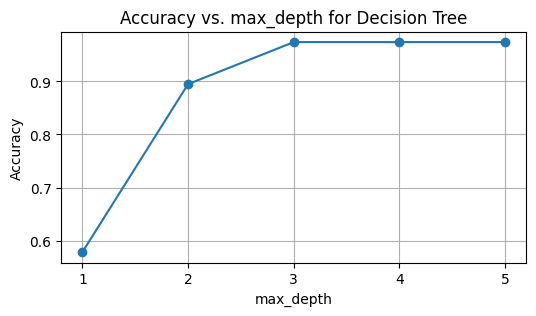

In [14]:
plt.figure(figsize=(6, 3))  # Set the figure size
plt.plot(max_depth_range, accuracy, marker='o')
plt.title('Accuracy vs. max_depth for Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_range)  # Show all max_depth values on the x-axis
plt.grid(True)
plt.show()

[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

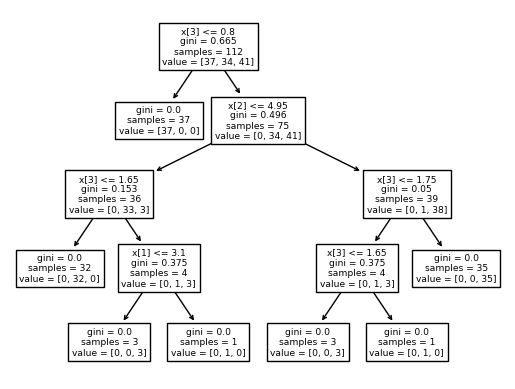

In [18]:
tree.plot_tree(clf) #default visualization based on model

###Bagged trees for controlling overfitting problem

In [20]:
reg= BaggingRegressor(random_state=0,n_estimators=100)

In [21]:
reg.fit(X_train,y_train)

BaggingRegressor(n_estimators=100, random_state=0)

In [23]:
reg.predict( X_test)

array([2.  , 1.02, 0.  , 1.99, 0.  , 2.  , 0.  , 1.01, 1.04, 1.  , 1.88,
       1.  , 1.  , 1.03, 1.  , 0.  , 1.02, 1.  , 0.  , 0.  , 1.83, 1.02,
       0.  , 0.  , 1.81, 0.  , 0.  , 1.  , 1.04, 0.  , 2.  , 1.02, 0.  ,
       1.82, 2.  , 1.01, 0.  , 1.87])

In [24]:
reg.score(X_test,y_test)

0.9594651219512195

###Tuning n_estimator (number of descion trees)

[1.0, 0.9662971175166297, 0.9624854819976771, 0.9597345245044542, 0.9609088666734377, 0.9614979229377069, 0.9597485595925564, 0.9590271965008879, 0.9596410422266088, 0.9584432185343469, 0.9594688229991799, 0.9602631636250621, 0.9604098747086781, 0.9597452249215109, 0.9599986995795716]


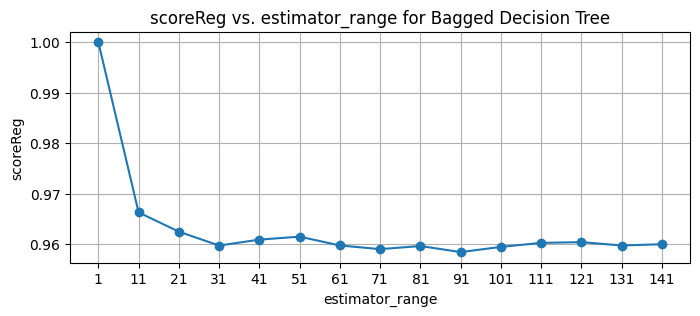

In [28]:
estimator_range=list(range(1,151,10))
scoreReg=[]

for estimator in estimator_range:
  reg= BaggingRegressor(random_state=0,n_estimators=estimator) #attention to dynamically do it
  reg.fit(X_train,y_train)
  scoreReg.append(reg.score(X_test,y_test))

print(scoreReg)
plt.figure(figsize=(8, 3))  # Set the figure size
plt.plot(estimator_range, scoreReg, marker='o')
plt.title('scoreReg vs. estimator_range for Bagged Decision Tree')
plt.xlabel('estimator_range')
plt.ylabel('scoreReg')
plt.xticks(estimator_range)  # Show all max_depth values on the x-axis
plt.grid(True)
plt.show()